# Plot RV curves

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

This code requires PyAstronomy 
- pip install PyAstronomy

In [ ]:
import pylab
import matplotlib.pyplot as plt
import numpy as np
from PyAstronomy import pyasl
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
def getrv(e,omega):
    ks = pyasl.MarkleyKESolver()
    vp=0.0
    Ksini=1.0
    M=np.linspace(0.0,4*np.pi,1000)
    cosfpo=[]
    for Meach in M:
        Eeach=ks.getE(Meach, e) #eccentric anomaly
        cosEeach=np.cos(Eeach)
        cosf=(-cosEeach + e)/(-1 + cosEeach*e)
        if Eeach < np.pi:
            sinf=-np.sqrt((-1 + cosEeach*cosEeach)*(-1 + e*e))/(-1 + cosEeach*e)
        else:
            sinf=np.sqrt((-1 + cosEeach*cosEeach)*(-1 + e*e))/(-1 + cosEeach*e)

        cosfpoeach=cosf*np.cos(omega)-sinf*np.sin(omega)
        cosfpo.append(cosfpoeach)

    cosfpo=np.array(cosfpo)
    face=1.0/np.sqrt(1.0-e*e)
    model = vp+Ksini*face*(cosfpo+e*np.cos(omega))
    return M, model

In [4]:
def conic(e,omega):
    t=np.linspace(-2*np.pi,2*np.pi,1000)
    f=t-omega
    r=(1-e**2)/(1+e*np.cos(f))
    x=r*np.cos(t)
    y=r*np.sin(t)
    return x,y

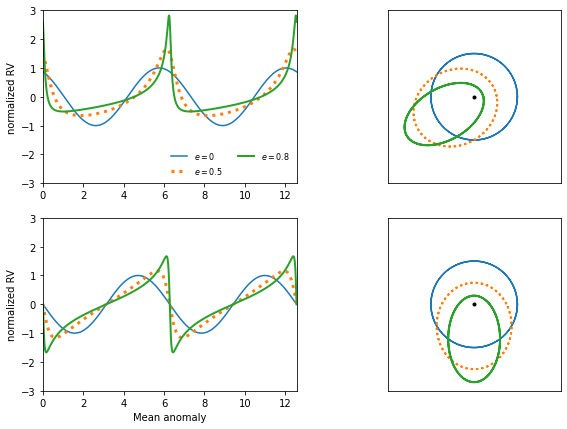

In [5]:
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(221)
pylab.ylim(-3,3)
pylab.xlim(0.0,4*np.pi)
M,model=getrv(0.0,np.pi/6)
ax.plot(M,model,color="C0")
M,model=getrv(0.5,np.pi/6)
ax.plot(M,model,color="C1",ls="dotted",lw=3)
M,model=getrv(0.8,np.pi/6)
ax.plot(M,model,color="C2",lw=2)
plt.legend(["$e=0$","$e=0.5$","$e=0.8$"],loc="lower right",prop={'size':8},frameon=False,ncol=2)
#
pylab.ylabel("normalized RV")

ax=fig.add_subplot(223)
pylab.ylim(-3,3)
pylab.xlim(0.0,4*np.pi)
M,model=getrv(0.0,np.pi/2)
ax.plot(M,model,color="C0")
M,model=getrv(0.5,np.pi/2)
ax.plot(M,model,color="C1",ls="dotted",lw=3)
M,model=getrv(0.8,np.pi/2)
ax.plot(M,model,color="C2",lw=2)
pylab.ylabel("normalized RV")
pylab.xlabel("Mean anomaly")

ax=fig.add_subplot(222)
pylab.ylim(-2,2)
pylab.xlim(-2,2)
x,y=conic(0.0,np.pi/6)
ax.plot(x,y,color="C0")
x,y=conic(0.5,np.pi/6)
ax.plot(x,y,color="C1",ls="dotted",lw=2)
x,y=conic(0.8,np.pi/6)
ax.plot([0],[0],".",color="black",lw=2)
ax.plot(x,y,color="C2",lw=2)
ax.set_aspect(1.0/ax.get_data_ratio())
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

ax=fig.add_subplot(224)
pylab.ylim(-2,2)
pylab.xlim(-2,2)
x,y=conic(0.0,np.pi/2)
ax.plot(x,y,color="C0")
x,y=conic(0.5,np.pi/2)
ax.plot(x,y,color="C1",ls="dotted",lw=2)
x,y=conic(0.8,np.pi/2)
ax.plot(x,y,color="C2",lw=2)
ax.plot([0],[0],".",color="black")
ax.set_aspect(1.0/ax.get_data_ratio())
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
plt.show()

In [ ]:
# just check

In [11]:
    ks = pyasl.MarkleyKESolver()
    M=np.linspace(0.0,4*np.pi,1000)
    e=0.5
    cosfa=[]
    sinfa=[]
    for Meach in M:
        Eeach=ks.getE(Meach, e) #eccentric anomaly
        cosEeach=np.cos(Eeach)
        cosf=(-cosEeach + e)/(-1 + cosEeach*e)
        if Eeach < np.pi:
            sinf=-np.sqrt((-1 + cosEeach*cosEeach)*(-1 + e*e))/(-1 + cosEeach*e)
        else:
            sinf=np.sqrt((-1 + cosEeach*cosEeach)*(-1 + e*e))/(-1 + cosEeach*e)
        sinfa.append(sinf)
        cosfa.append(cosf)
    sinfa=np.array(sinfa)
    cosfa=np.array(cosfa)

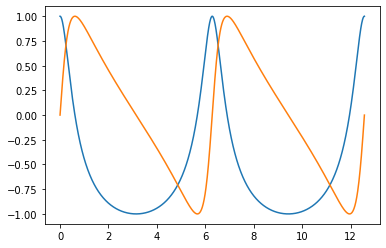

In [12]:
plt.plot(M,cosfa)
plt.plot(M,sinfa)

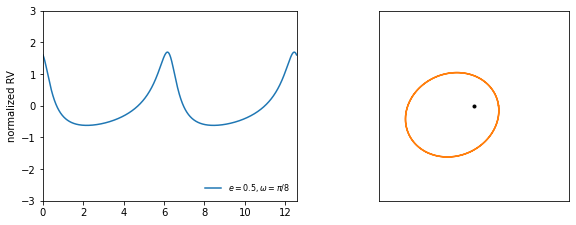

In [11]:
fig=plt.figure(figsize=(10,3.5))
ax=fig.add_subplot(121)
pylab.ylim(-3,3)
pylab.xlim(0.0,4*np.pi)
M,model=getrv(0.5,np.pi/8)
ax.plot(M,model,color="C0")

plt.legend(["$e=0.5, \omega=\pi/8$"],loc="lower right",prop={'size':8},frameon=False,ncol=2)
#
pylab.ylabel("normalized RV")

ax=fig.add_subplot(122)
pylab.ylim(-2,2)
pylab.xlim(-2,2)
x,y=conic(0.5,np.pi/8)
ax.plot(x,y,color="C1")
ax.plot([0],[0],".",color="black")
ax.set_aspect(1.0/ax.get_data_ratio())
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
plt.show()